# Correlation of Crimes with the Temperature

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
%matplotlib inline

/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
  # This is added back by InteractiveShellApp.init_path()


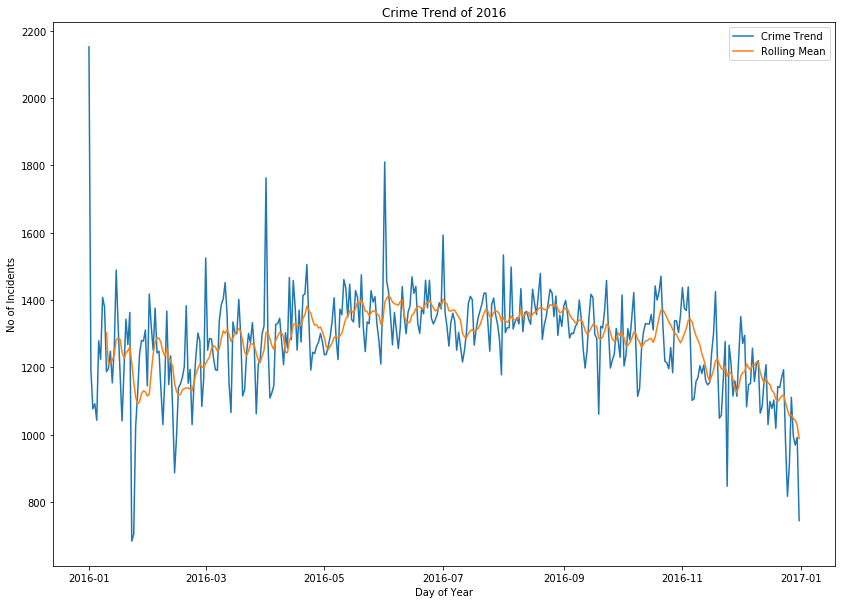

In [14]:
df11 = pd.read_csv("crime-data-by-year/2016_data.out", header = -1, delimiter = "'")
df11[2] = df11[2].str.replace(',', '')
df11[2] = df11[2].str.replace(')', '')
df11[1] = pd.to_datetime(df11[1])
df11 = df11.drop(0, axis=1)
df11.columns = ['Date', 'Incidents']
df11['Incidents'] = df11['Incidents'].astype('int')

df11 = df11.set_index('Date')
df11.sort_index(inplace=True)
mean = pd.rolling_mean(df11, window = 10)

plt.figure(figsize=(14, 10))
plt.plot(df11['Incidents'], label = 'Crime Trend')
plt.plot(mean, label = 'Rolling Mean')
plt.xlabel('Day of Year')
plt.ylabel('No of Incidents')
plt.legend()
plt.title('Crime Trend of 2016')

We can see that there is a general trend going on with the rolling mean going down during the Winter months, so we decided to correlate the Crime data with the Weather dataset.

In [10]:
# Importing the Weather Dataset

# 2016 Data

weather = pd.read_csv('NYC_Weather.csv')
weather['date'] =pd.to_datetime(weather.date)
weather = weather.set_index('date')
d1 = weather['average temperature']
d2 = df11['Incidents']

corr, pvalue = spearmanr(d1, d2)
print "Sample Size:\t\t\t", len(d1)
print "Correlation Coefficient:\t", corr
print "P-Value:\t\t\t", pvalue

Sample Size:			366
Correlation Coefficient:	0.608202764393
P-Value:			2.1195302026e-38


The P-Value less than 0.05 suggests that there is a greater than 95% chance that the two datasets are not idependent, it suggests that there might be some relation between the 2 datasets. The correlation coefficient of 0.6 suggests a positive correlation of the Number of Incidents to the Temperature. 